## Assignment 3
### Question 2: Implement k-Means clustering algorithm on diabetic dataset
### Link: https://www.kaggle.com/saurabh00007/diabetescsv

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
X = df.iloc[:,:-1].values
y = df['Outcome'].values

#Training the model 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [6]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.89142243, 0.059357  ])

In [7]:
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans as KM
kmeans = KM(n_clusters = 2, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit(X,y)

In [8]:
y_kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [9]:
# List for original values vs predicted values
for i in range(len(y_kmeans.labels_)):
    print("Original Values: ",y[i]," Predicted Values: ",y_kmeans.labels_[i])

Original Values:  1  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  1
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  1
Original Values:  1  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  1
Original Values:  1  Predicted Values:  1
Original Values:  1  Predicted Values:  0
Original Values:  1  Predicted Values:  1
Original Values:  1  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  0
Original Values:  0  Predicted Values:  1
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  0
Original Values:  1  Predicted Val

Original Values:  1  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  1
Original Values:  1  Predicted Values:  1
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  0
Original Values:  0  Predicted Values:  1
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  0
Original Values:  1  Predicted Values:  1
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  1
Original Values:  1  Predicted Values:  1
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Val

Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  1
Original Values:  0  Predicted Values:  1
Original Values:  0  Predicted Values:  1
Original Values:  1  Predicted Values:  1
Original Values:  1  Predicted Values:  1
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  1
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Values:  0
Original Values:  1  Predicted Values:  0
Original Values:  0  Predicted Values:  1
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  0  Predicted Values:  0
Original Values:  1  Predicted Val

In [10]:
# Clusters Center
kmeans.cluster_centers_

array([[  3.88391376, 115.26699834,  68.09784411,  17.6185738 ,
         32.21227197,  31.17363184,   0.43757048,  33.11442786],
       [  3.7030303 , 141.46060606,  72.78787879,  31.2       ,
        253.70909091,  34.98545455,   0.59724848,  33.7030303 ]])

In [11]:
# Classification Report
from sklearn.metrics import classification_report as CR
print(CR(y,y_kmeans.labels_))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       500
           1       0.52      0.32      0.40       268

    accuracy                           0.66       768
   macro avg       0.61      0.58      0.58       768
weighted avg       0.64      0.66      0.64       768



## Original Visualization

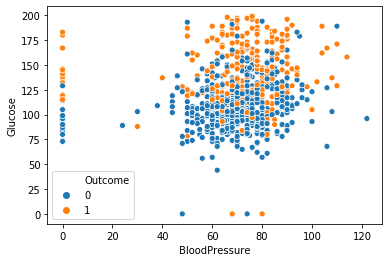

In [13]:
sns.scatterplot(x='BloodPressure',y='Glucose',hue='Outcome',data=df)

## Predicted Visualisation

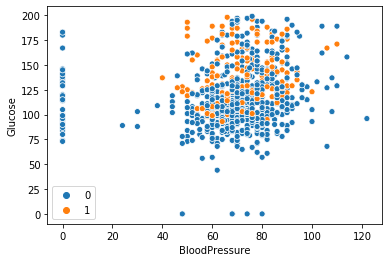

In [14]:
sns.scatterplot(x='BloodPressure',y='Glucose',hue=y_kmeans.labels_,data=df)

In [17]:
# Confusion Matrix for a better understanding of our data
from sklearn.metrics import confusion_matrix as CM
cm=CM(y,y_kmeans.labels_)

In [18]:
print(cm)

[[421  79]
 [182  86]]


In [21]:
# Accuracy of the model
from sklearn.metrics import accuracy_score as AS
accuracy = AS(y,y_kmeans.labels_)

In [22]:
print(accuracy)

0.66015625


## Visualisation

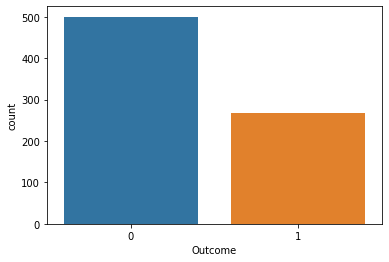

In [23]:
sns.countplot(x='Outcome',data=df)

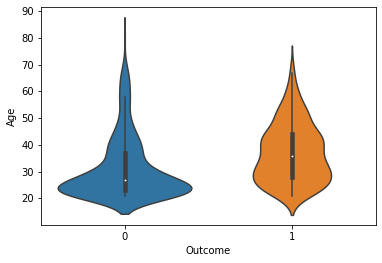

In [24]:
sns.violinplot(x='Outcome',y='Age',data=df)

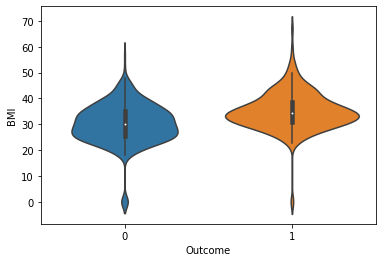

In [25]:
sns.violinplot(x='Outcome',y='BMI',data=df)

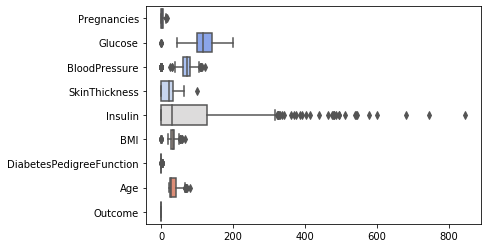

In [26]:
#Can do entire dataframe with orient='h'
sns.boxplot(data=df,palette='coolwarm',orient='h')

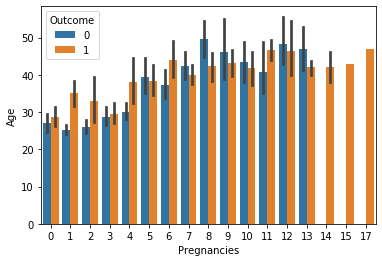

In [27]:
sns.barplot(x='Pregnancies',y='Age',hue='Outcome',data=df)

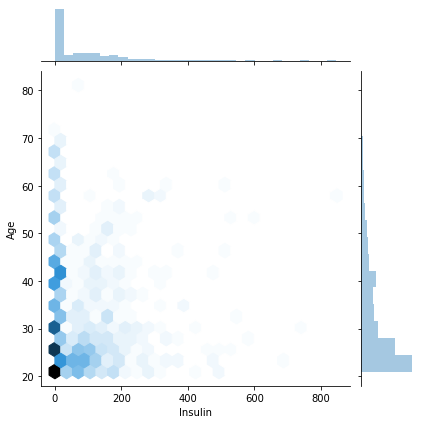

In [28]:
sns.jointplot("Insulin","Age", data=df, kind='hex');

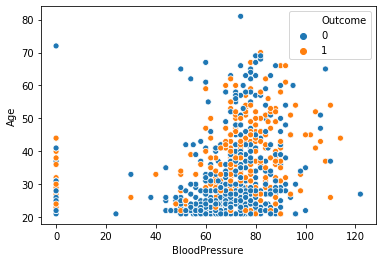

In [29]:
sns.scatterplot(x='BloodPressure', y='Age',data=df,hue='Outcome')

## Tunning The Model

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
print(KM())

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [32]:
init=['k-means++','random']
algorithm =['auto','full','elkan']

In [33]:
p_grid={
    'algorithm': algorithm,
    'init': init
}
grid_search = GridSearchCV(estimator = y_kmeans,
                           param_grid = p_grid,
                           cv = 10,
                           n_jobs = -1)

In [34]:
grid_search.fit(X,y)

C:\Users\SAHIL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=300, n_clusters=2, n_init=10,
                              n_jobs=None, precompute_distances='auto',
                              random_state=0, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'init': ['k-means++', 'random']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
grid_search.best_params_

{'algorithm': 'auto', 'init': 'k-means++'}

### That Means we do not need to change anything

## Max Accuracy: 66%

#### Name: Sahil Harjai